In [1]:
from bert_functions_v2 import analyzeWord, getBert
from createDims import createPolarDimension
from get_data_from_file import create_lookup_from_data_file,create_lookupFiles_out_of_adjectives_list_using_file
import nltk
from nltk.corpus import wordnet as wn
import numpy as np
import pickle
import json
import string
import ast
import torch
import pandas as pd
import re

## use of input data provided via a file by user

In [2]:

out='antonyms_file/' #folder where the lookup files will be saved
file='data_file.xlsx' #name of the file
create_lookup_from_data_file(file,out)

# get the embedding model 
tokenizer, model = getBert()
print("Model imported")

# create the base change matrix (this might take some time)
createPolarDimension(model, tokenizer, out_path=out, antonym_path=out + "antonym_wordnet_example_sentences_readable_extended.txt")
print("dimensions created")


# base change does not work well with only few dimensions -> compare with projection
antonym_path = out + "polar_dimensions.pkl"
word = "school"
context = "school teaches you a lot of good and smart things"
analyzeWord(word, context, model=model,tokenizer=tokenizer, antonym_path=antonym_path, lookup_path=out, numberPolar=2,method="projection") #method="projection"

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Model imported
Start forwarding the Polar opposites ...
dimensions created
Analyzing the word:  school
In the context of:  school teaches you a lot of good and smart things
Top:  1
Dimension:  test<------>test2
Definitions:   <------> 
Value: -2.6646461


Top:  2
Dimension:  one<------>two
Definitions:   <------> 
Value:                      1.0413853




(['test---test2', 'one---two'],
 array([-2.6646461,  1.0413853,  0.9279724], dtype=float32),
 {('test', 'test2'): -2.6646461, ('one', 'two'): 1.0413853},
 'school')

## coordinative system visualization function

In [3]:
def two_dim_visualization(results_of_analyse_word): #the variable should be a list
    #Retreive the antonyms list
    keys=list(results_of_analyse_word[0][2].keys())
    
    #ask from user for the keys
   


    #this block of code should be changed in case of using it on front end!!!!!!!!!!!!
    key_input_1=input('Enter the first antonym pair number')
    key_input_2=input('Enter the second antonym pair number')
    
    
    
    
    #select two antonym pairs
    keyx=keys[int(key_input_1)]
    keyy=keys[int(key_input_2)]
    
    #list to store values
    valuesx=[]
    valuesy=[]
    
    words=[]
    for results in results_of_analyse_word:
        words.append(results[3])
        dim=results[2]
        valuesx.append(dim[keyx])
        valuesy.append(dim[keyy])

        
    import numpy as np
    import matplotlib.pyplot as plt    

    # Enter x and y coordinates of points and colors
    xs = valuesx
    ys = valuesy
    
    #list of colors  !!!!limits the length of input, should be equal or less than the list below
    colors_full = ['black', 'forestgreen','aqua','yellow','red','brown','magneta','goldenrod']
    
    colors=[]
    for i in range(len(valuesx)):
        colors.append(colors_full[i])
    # Select length of axes and the space between tick labels
    xmin, xmax, ymin, ymax = -5, 5, -5, 5
    ticks_frequency = 1

    # Plot points
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.scatter(xs, ys, c=colors)

    # Draw lines connecting points to axes
    #for x, y, c in zip(xs, ys, colors):
    #    ax.plot([x, x], [0, y], c=c, ls='--', lw=1.5, alpha=0.5)
    #    ax.plot([0, x], [y, y], c=c, ls='--', lw=1.5, alpha=0.5)

    # Set identical scales for both axes
    ax.set(xlim=(xmin-1, xmax+1), ylim=(ymin-1, ymax+1), aspect='equal')

    # Set bottom and left spines as x and y axes of coordinate system
    ax.spines['bottom'].set_position('zero')
    ax.spines['left'].set_position('zero')

    # Remove top and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # Create 'x' and 'y' labels placed at the end of the axes
    ax.set_xlabel(keyx, size=14, labelpad=-21, x=1.03)
    ax.set_ylabel(keyy, size=14, labelpad=-15, y=1.02, rotation=0)



    # Create custom major ticks to determine position of tick labels
    x_ticks = np.arange(xmin, xmax+1, ticks_frequency)
    y_ticks = np.arange(ymin, ymax+1, ticks_frequency)
    ax.set_xticks(x_ticks[x_ticks != 0])
    ax.set_yticks(y_ticks[y_ticks != 0])

    # Create minor ticks placed at each integer to enable drawing of minor grid
    # lines: note that this has no effect in this example with ticks_frequency=1
    ax.set_xticks(np.arange(xmin, xmax+1), minor=True)
    ax.set_yticks(np.arange(ymin, ymax+1), minor=True)

    # Draw major and minor grid lines
    ax.grid(which='both', color='grey', linewidth=1, linestyle='-', alpha=0.2)

    # Draw arrows
    arrow_fmt = dict(markersize=4, color='black', clip_on=False)
    ax.plot((1), (0), marker='>', transform=ax.get_yaxis_transform(), **arrow_fmt)
    ax.plot((0), (1), marker='^', transform=ax.get_xaxis_transform(), **arrow_fmt)
    
       
        
    return plt.show()
        
        
        
        
    

In [4]:
antonym_path = out + "polar_dimensions.pkl"
word = "school"
context = "school teaches you a lot of good and smart things"
school=analyzeWord(word, context, model=model,tokenizer=tokenizer, antonym_path=antonym_path, lookup_path=out, numberPolar=2,method="projection") #method="projection"

Analyzing the word:  school
In the context of:  school teaches you a lot of good and smart things
Top:  1
Dimension:  test<------>test2
Definitions:   <------> 
Value: -2.6646461


Top:  2
Dimension:  one<------>two
Definitions:   <------> 
Value:                      1.0413853




In [5]:
antonym_path = out + "polar_dimensions.pkl"
word = "university"
context = "university is a huge institution"
university=analyzeWord(word, context, model=model,tokenizer=tokenizer, antonym_path=antonym_path, lookup_path=out, numberPolar=2,method="projection")

Analyzing the word:  university
In the context of:  university is a huge institution
Top:  1
Dimension:  test<------>test2
Definitions:   <------> 
Value: -3.4593697


Top:  2
Dimension:  one<------>two
Definitions:   <------> 
Value:                      2.3705359




In [6]:
antonym_path = out + "polar_dimensions.pkl"
word = "hospital"
context = "hospital is a building with a lot of doctors"
hospital=analyzeWord(word, context, model=model,tokenizer=tokenizer, antonym_path=antonym_path, lookup_path=out, numberPolar=2,method="projection")

Analyzing the word:  hospital
In the context of:  hospital is a building with a lot of doctors
Top:  1
Dimension:  test<------>test2
Definitions:   <------> 
Value: -4.3481913


Top:  2
Dimension:  one<------>two
Definitions:   <------> 
Value:                      2.4414263




Enter the first antonym pair number0
Enter the second antonym pair number1


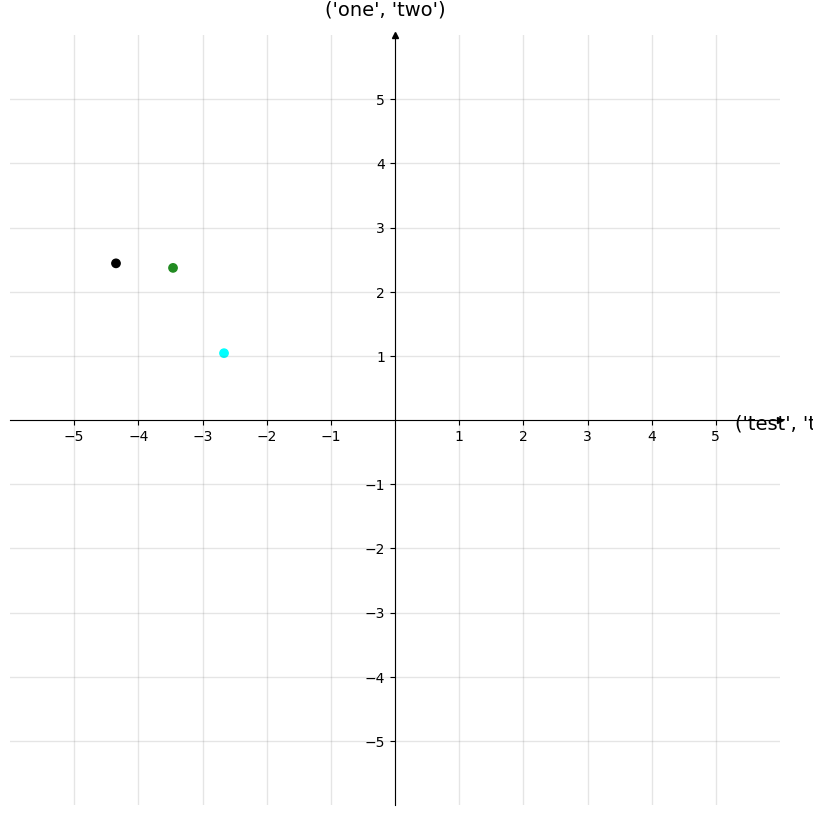

In [7]:

two_dim_visualization([hospital,university,school])

## visualizationn of antonyms with the highest difference

In [8]:
#

def most_descriptive_antonyms(word1,word2,k):


    from collections import defaultdict
    import matplotlib.pyplot as plt
    import numpy as np
    diff_dict=defaultdict()

    word1_dict=word1[2]
    word2_dict=word2[2]



    def intersection(lst1, lst2):
        lst3 = [value for value in lst1 if value in lst2]
        return lst3

    keys_word_1=list(word1_dict.keys())
    keys_word_2=list(word2_dict.keys())

    common_keys=intersection(keys_word_1,keys_word_2)


    difference_dict=defaultdict()

    for key in common_keys:
        difference_dict[key]=word1_dict[key]-word2_dict[key]

    sorted_difference_dict=dict(sorted(difference_dict.items(), key=lambda x:abs(x[1]) ,reverse=True))

    sorted_keys=list(sorted_difference_dict.keys())

    left_axis=[]
    right_axis=[]
    values_word1=[]
    values_word2=[]

    for i in range(k):
        left_axis.append(sorted_keys[i][0])
        right_axis.append(sorted_keys[i][1])
        values_word1.append(word1_dict[sorted_keys[i]])
        values_word2.append(word2_dict[sorted_keys[i]])



    plt.rcdefaults()
    fig, ax = plt.subplots()

    ax.set(xlim=(-5, 5))
    y_pos = np.arange(len(right_axis))
    width = 0.4

    ax.barh(y_pos, values_word1, width,align='center',label=word1[3])
    ax.barh(y_pos+width, values_word2, width,align='center',label=word2[3])
    ax.set_yticks(y_pos, labels=left_axis)
    ax.invert_yaxis()  # labels read top-to-bottom


    ax2 = ax.twinx()
    ax2.set_ylim(ax.get_ylim())
    ax2.set_yticks(y_pos,right_axis)
    ax.legend()
    
    plt.show()

    return



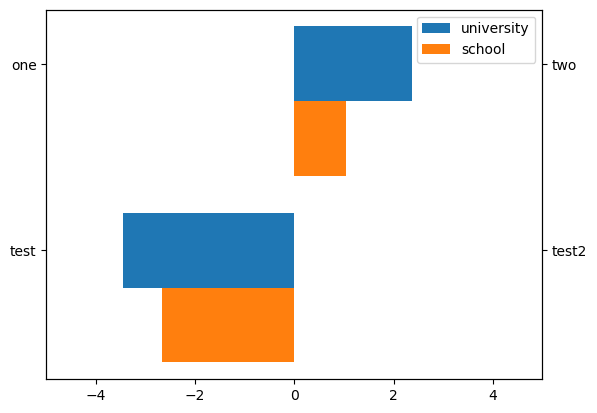

In [9]:
most_descriptive_antonyms(university,school,2)

## manual imput of dimension

In [10]:
def create_dimensions_list():
    from collections import defaultdict
    word="1"
    #d for dimensions
    d=[]
    while word != '' :
        antonyms=defaultdict()
        index=0
        word=input('Enter word: ')
        if word !='':
            #get all synstets
            synsets=wn.synsets(word)

            #create dictionary only with synsets that have an antonym
            for i in synsets:
                if(len(i.lemmas()[0].antonyms()) !=0):
                    ant=i.lemmas()[0].antonyms()[0]
                    antonyms[i]=ant.synset()
                    
            #keep only antonym pairs that have examples
            for key in list(antonyms.keys()):
                if (len(key.examples())==0 or len(antonyms[key].examples())==0):
                    del antonyms[key]


            #visualize definitions

            for key in list(antonyms.keys()):
                print("Antonym pair index {}".format(index))
                print("   Antonym pair {}-----{} ".format(key,antonyms[key]))
                print("        Definition {} => {} ".format(key,key.definition()))
                print("        Definition {} => {} ".format(antonyms[key],antonyms[key].definition()))
                print(" ")
                print(" ")
                print(" ")
                index+=1
            
            #create list of desired dimensions 
            selected_antonym_pair_index=int(input('Enter the index of desired antonym pair: '))

            key=list(antonyms.keys())[selected_antonym_pair_index]

            d.append(list([key.name(),antonyms[key].name()]))
            print(" ")
            print(" ")
            print(" ")

    return d



In [11]:
dims=create_dimensions_list()

Enter word: good
Antonym pair index 0
   Antonym pair Synset('good.n.02')-----Synset('evil.n.03') 
        Definition Synset('good.n.02') => moral excellence or admirableness 
        Definition Synset('evil.n.03') => the quality of being morally wrong in principle or practice 
 
 
 
Antonym pair index 1
   Antonym pair Synset('good.n.03')-----Synset('bad.n.01') 
        Definition Synset('good.n.03') => that which is pleasing or valuable or useful 
        Definition Synset('bad.n.01') => that which is below standard or expectations as of ethics or decency 
 
 
 
Antonym pair index 2
   Antonym pair Synset('good.a.01')-----Synset('bad.a.01') 
        Definition Synset('good.a.01') => having desirable or positive qualities especially those suitable for a thing specified 
        Definition Synset('bad.a.01') => having undesirable or negative qualities 
 
 
 
Antonym pair index 3
   Antonym pair Synset('well.r.01')-----Synset('ill.r.01') 
        Definition Synset('well.r.01') => (often

In [12]:
dims


[['good.n.02', 'evil.n.03']]

# create lookup files out of a adjectives list (file)


In [2]:
out='antonyms_adj_files/'
file_name='adjectives_list.xlsx'
create_lookupFiles_out_of_adjectives_list_using_file(file_name,out)